<a href="https://colab.research.google.com/github/AdarshHaria1/The-Spark-Foundation/blob/main/TSF_Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **THE SPARKS FOUNDATION**

## Name: Adarsh Haria
## Task 1: Prediction Using Suprvised ML


Here we are going predict the percentage of marks of an student based on the number of study hours with help of simple linear regression as it involves just 2 variables.

### Importing Libraries

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


### Reading the Data

In [4]:
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df = pd.read_csv(url)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Summarizing Data

In [6]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [9]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

### Visualizing Data

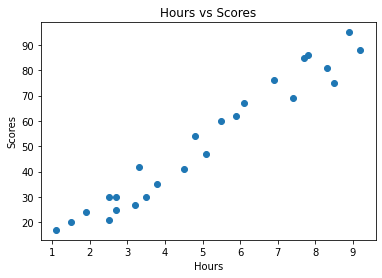

In [10]:
plt.scatter(df.Hours, df.Scores, marker='o')
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Hours vs Scores")
plt.show()

### Train - Test - Split

In [15]:
X = df[['Hours']] #returns a dataframe
Y = df['Scores'] #returns a series

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
print(X_train.shape , Y_train.shape, X_test.shape, Y_test.shape)

(20, 1) (20,) (5, 1) (5,)


### Modeling

In [20]:
from sklearn import  linear_model
regression = linear_model.LinearRegression()
regression.fit(X_train,Y_train)
# The coefficients
print ('Coefficients: ', regression.coef_)
print ('Intercept: ',regression.intercept_)

Coefficients:  [9.51165561]
Intercept:  3.289390845669537


Text(0, 0.5, 'Scores')

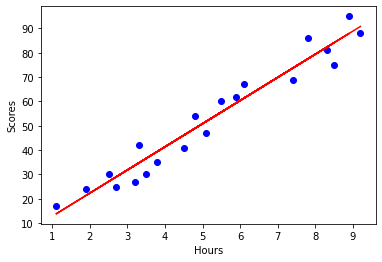

In [23]:
plt.scatter(X_train, Y_train,  color='blue')
plt.plot(X_train, regression.coef_[0]*X_train + regression.intercept_, '-r')
plt.xlabel("Hours")
plt.ylabel("Scores")

### Evaluation

In [32]:
from sklearn.metrics import r2_score
test_y_hat = regression.predict(X_test)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - Y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - Y_test) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , Y_test) )

Mean absolute error: 5.02
Residual sum of squares (MSE): 33.15
R2-score: 0.94


In [34]:
df1 = pd.DataFrame({'Actual Score': Y_test , 'Predicted Score' : test_y_hat})
df1

,Actual Score,Predicted Score
10,85,76.529139
0,21,27.068530
20,30,28.970861
5,20,17.556874
23,76,68.919815


### Prediction
Predicting the score if student studies for 9.25 hours per day

In [30]:
Predicted_score = regression.predict([[9.25]])
print( "If a student studies for 9.25 hours per day he might score : ", Predicted_score)

If a student studies for 9.25 hours per day he might score :  [91.27220521]
